# CURSO VISUALIZACIÓN DE LA INFORMACIÓN
## TRABAJO PRÁCTICO 1

### Ejercicio 2
Analice los informes obtenidos de los datasets del ejercicio anterior y realice un
informe de las presentaciones, con conclusiones, y si considera que las visualizaciones son
efectivas y de fácil interpretación, etc. y ¿Cómo las mejorarían?

## Netflix 

### Lectura DataSet Netflix

In [2]:
import pandas as pd

data_netflix = pd.read_csv("netflix.csv") 

In [3]:
# Convertir la columna 'date_added' a tipo date
data_netflix['date_added'] = pd.to_datetime(data_netflix['date_added'], format='%d de %B de %Y', errors='coerce')
data_netflix.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Analis del informe

Se procede a analizar cada una de las secciones.

#### 1) Porcentajes del tipo de contenido 

In [4]:
data_netflix_type = data_netflix.groupby('type').count()
data_netflix_type

,show_id,title,director,country,date_added,release_year,rating,duration,listed_in
type,,,,,,,,,
Movie,6126,6126,6126,6126,6126,6126,6126,6126,6126
TV Show,2664,2664,2664,2664,2664,2664,2664,2664,2664


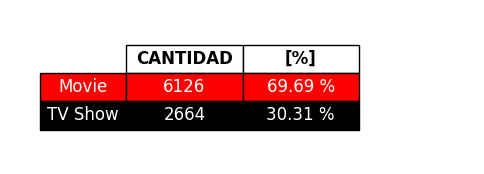

"\ncellColours=[['white']*2] + [colors]*len(df),\n"

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(data_netflix_type)

# Calcular los porcentajes
total = df['show_id'].sum()
df['[%]'] = df['show_id'] / total * 100
df['[%]'] = df['[%]'].apply(lambda x: f"{x:.2f} %")

# Crear la tabla con Matplotlib
fig, ax = plt.subplots(figsize=(6, 2))  # Ajusta el tamaño según necesites

ax.axis('tight')
ax.axis('off')

# Crear un degradado de grises para las filas de datos
cmap = plt.get_cmap('Greys')
colors = [cmap(i) for i in np.linspace(0.3, 0.7, len(df))]

# Crear la tabla
table = ax.table(cellText=df[['show_id', '[%]']].values,
                 rowLabels=df.index,
                 colLabels=['CANTIDAD', '[%]'],
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

# Estilizar la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(.5, 1.7)

# Colorear la primera fila (header) de rojo
# Colorear el título de la tabla con fondo blanco
for (i, j), cell in table.get_celld().items():
    if i == 0 and j >= 0:
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('white')
    elif i == 1:
        cell.set_facecolor('red')
        cell.set_text_props(color='white')
    elif i == 2:
        cell.set_facecolor('black')
        cell.set_text_props(color='white')
    elif j == -1:  # Color de las etiquetas de las filas (row labels)
        cell.set_facecolor('white')
    cell.set_edgecolor('black')
    
plt.show()
"""
cellColours=[['white']*2] + [colors]*len(df),
"""

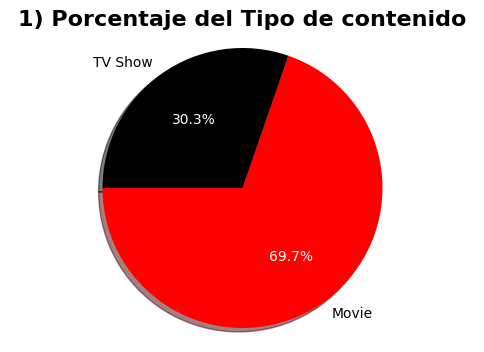

In [12]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
colors = ['red', 'black']
wedges, texts, autotexts = ax.pie(data_netflix_type.title,  labels=data_netflix_type.index, autopct='%1.1f%%', shadow=True, startangle=180, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Cambiar el color del texto
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
plt.title("1) Porcentaje del Tipo de contenido", fontdict={'fontsize': 16, 'fontweight': 'bold'}) 
plt.show()

En la sección 1: la información de la tabla resulta redundante y los colores no lucen adecuado con el branding de la compañia.

Por lo que considero dejar solo la torta y cambiar los colores a rojo y negro.

#### 2-a) Distribución geográfica de los 10 paises con mayor cantidad de títulos, discriminados por Movies y TV Shows.

In [123]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim


# Leer el archivo CSV
data =data_netflix

# Filtrar los datos para los países y tipos de contenido
data = data[['country', 'type']]
data = data.dropna(subset=['country'])

# Contar la cantidad de títulos por país y tipo
country_data = data.groupby(['country', 'type']).size().unstack(fill_value=0)
country_data['total'] = country_data['Movie'] + country_data['TV Show']
country_data = country_data.sort_values(by='total',ascending=False)
country_data = country_data.head(10)

# Obtener coordenadas de los países
geolocator = Nominatim(user_agent="geoapiExercises")
locations = {}

for country in country_data.index:
    location = geolocator.geocode(country)
    if location:
        locations[country] = [location.latitude, location.longitude]

# Añadir coordenadas a los datos
country_data = country_data.reset_index()
country_data['coordinates'] = country_data['country'].map(locations)
country_data = country_data.dropna(subset=['coordinates'])

# Crear el mapa base
m = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB dark_matter')

# Añadir marcadores al mapa
for _, row in country_data.iterrows():
    lat, lon = row['coordinates']
    folium.CircleMarker(
        location=[lat, lon],
        radius=row['Movie'] / 100,  # Ajustar el tamaño según la cantidad de contenidos
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['country']}: {row['Movie']} Movies"
    ).add_to(m)
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=row['TV Show'] / 100,  # Ajustar el tamaño según la cantidad de contenidos
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['country']}: {row['TV Show']} TV Shows"
    ).add_to(m)

# Añadir una leyenda personalizada
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 90px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; border-radius:6px; padding: 10px;">
     <i class="fa fa-circle" style="color:blue"></i> Movies <br>
     <i class="fa fa-circle" style="color:red"></i> TV Shows
     </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))
m

En el mapa no se podia apreciar los TV Shows, por lo que le asigne un color rojo y a las Movies un marcador azul.

In [48]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

# Leer el archivo CSV
data = data_netflix

# Filtrar los datos para los países y tipos de contenido
data = data[['country', 'type']]
data = data.dropna(subset=['country'])

# Contar la cantidad de títulos por país y tipo
country_data = data.groupby(['country', 'type']).size().unstack(fill_value=0)
country_data['total'] = country_data['Movie'] + country_data['TV Show']
country_data = country_data.sort_values(by='total', ascending=False)
country_data = country_data.head(10)

# Obtener coordenadas de los países
geolocator = Nominatim(user_agent="geoapiExercises")
locations = {}

for country in country_data.index:
    location = geolocator.geocode(country)
    if location:
        locations[country] = [location.latitude, location.longitude]

# Añadir coordenadas a los datos
country_data = country_data.reset_index()
country_data['coordinates'] = country_data['country'].map(locations)
country_data = country_data.dropna(subset=['coordinates'])

# Crear el mapa base
m = folium.Map(location=[20, 0], zoom_start=2.4, tiles='CartoDB dark_matter')

# Añadir marcadores al mapa con etiquetas
for _, row in country_data.iterrows():
    lat, lon = row['coordinates']
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=row['Movie'] / 100,  # Ajustar el tamaño según la cantidad de contenidos
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['country']}: {row['Movie']} Movies"
    ).add_to(m)
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=row['TV Show'] / 100,  # Ajustar el tamaño según la cantidad de contenidos
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['country']}: {row['TV Show']} TV Shows"
    ).add_to(m)
    
    # Agregar etiquetas
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(html=f'<div style="font-size: 12px; color: white;">{row["country"]}</div>')
    ).add_to(m)

# Añadir una leyenda personalizada
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 90px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; border-radius:6px; padding: 10px;">
     <i class="fa fa-circle" style="color:blue"></i> Movies <br>
     <i class="fa fa-circle" style="color:red"></i> TV Shows
     </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

# Añadir título
title_html = '''
     <h3 align="center" style="font-size:20px"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  2-B) Distribución geográfica de los 10 paises con mayor cantidad de títulos, discriminados por Movies y TV Shows.</b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))

m


#### 2-b) Los 10 países con mayor cantidad de títulos, y su discriminación

In [14]:
# Contar la cantidad de 'Movies' y 'TV Shows' por país
country_type_counts = data_netflix.groupby(['country', 'type']).size().unstack(fill_value=0)

# Agregar una columna con el total de títulos por país
country_type_counts['Total'] = country_type_counts.sum(axis=1)

# Ordenar los países por el total de títulos de forma descendente y seleccionar los primeros 10
top_countries = country_type_counts.sort_values(by='Total', ascending=False).head(10)

print(top_countries)


type            Movie  TV Show  Total
country                              
United States    2395      845   3240
India             976       81   1057
United Kingdom    387      251    638
Pakistan           71      350    421
Not Given         257       30    287
Canada            187       84    271
Japan              87      172    259
South Korea        49      165    214
France            148       65    213
Spain             129       53    182


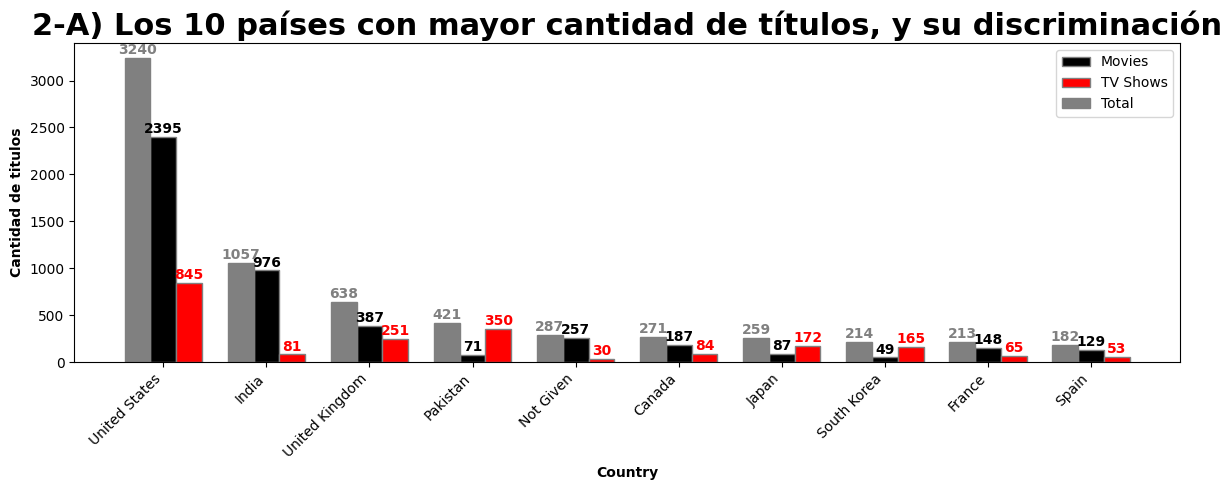

In [21]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(12, 5))

# Definir el ancho de las barras
bar_width = 0.25

# Definir la posición de las barras en el eje x
r1 = range(len(top_countries))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
bars1 = ax.bar(r2, top_countries['Movie'], color='black', width=bar_width, edgecolor='grey', label='Movies')
bars2 = ax.bar(r3, top_countries['TV Show'], color='red', width=bar_width, edgecolor='grey', label='TV Shows')
bars3 = ax.bar(r1, top_countries['Total'], color='grey', width=bar_width, edgecolor='grey', label='Total')

# Añadir etiquetas de país en el eje x
ax.set_xlabel('Country', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(top_countries))])
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')

# Añadir etiquetas y título
ax.set_ylabel('Cantidad de titulos', fontweight='bold')
ax.set_title('2-A) Los 10 países con mayor cantidad de títulos, y su discriminación', fontdict={'fontsize': 22, 'fontweight': 'bold'})

# Añadir las etiquetas de valor encima de cada barra
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', color='black', fontweight='bold')
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', color='red', fontweight='bold')
for bar in bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', color='grey', fontweight='bold')


# Añadir leyenda
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Se cambió los colores e hicieron mas altas las columnas para poder apreciar las diferencias.

#### 3) Cantidad de titulos por año, a partir del 2008.

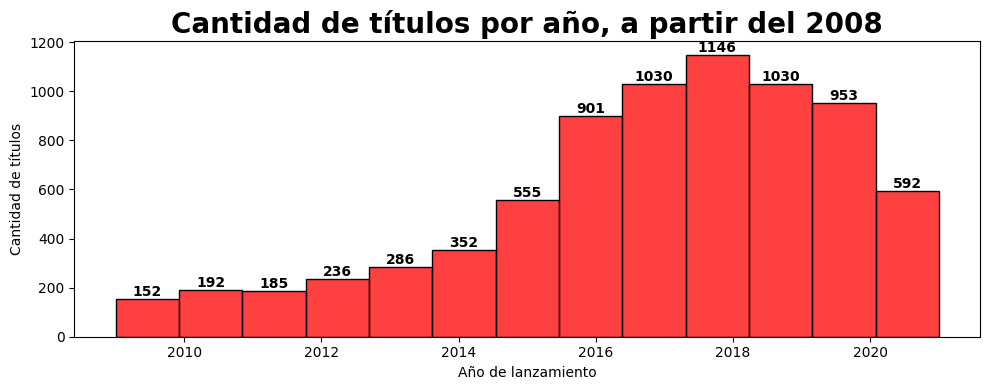

In [324]:

from numpy import datetime64
import seaborn as sns
data_netflix = pd.read_csv("netflix.csv") 
#v2008 = datetime64('2008-01-01')
# Convertir la columna 'date_added' a tipo date
#data_netflix['date_added'] = pd.to_datetime(data_netflix['date_added'], format='%d de %B de %Y', errors='coerce')
data_netflix_2008 = data_netflix[data_netflix['release_year'] > 2008 ]
anios = len(data_netflix_2008['release_year'].unique())
# Visualización de la evolución de incorporaciones a lo largo de los años
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 4))  # Ajustar el tamaño de la figura si es necesario

# Crear el histograma
bar1 = sns.histplot(data_netflix_2008.release_year, kde=False, color='red', bins=anios)

# Añadir etiquetas y título
ax.set_title('Cantidad de títulos por año, a partir del 2008', fontdict={'fontsize': 20, 'fontweight': 'bold'} )
ax.set_xlabel('Año de lanzamiento')
ax.set_ylabel('Cantidad de títulos')

# Añadir las etiquetas de valor encima de cada barra
for p in bar1.patches:
    bar_height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., bar_height , int(bar_height), ha='center', va='bottom', color='black', fontweight='bold')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Se cambio a la misma colometria y se muestra los valores de los años en forma ascendente de acuerdo al titulo de esta sección.

#### 4) Top 5 directores con más títulos, desglosado por tipo

In [223]:
# Contar la cantidad de 'Movies' y 'TV Shows' por país
data_netflix_no_director = data_netflix[data_netflix['director'] != 'Not Given']
director_type_counts = data_netflix_no_director.groupby(['director', 'type']).size().unstack(fill_value=0)

# Agregar una columna con el total de títulos por país
director_type_counts['Total'] = director_type_counts.sum(axis=1)

# Ordenar los países por el total de títulos de forma descendente y seleccionar los primeros 10
top_director = director_type_counts.sort_values(by='Total', ascending=False).head(5).reset_index()

top_director


type,director,Movie,TV Show,Total
0,Rajiv Chilaka,19,1,20
1,Alastair Fothergill,4,14,18
2,"Raúl Campos, Jan Suter",18,0,18
3,Marcus Raboy,15,1,16
4,Suhas Kadav,16,0,16


In [230]:
import pandas as pd

df = pd.DataFrame(top_director)

# Estilo de la tabla
def color_rows(row):
    # Obtener el índice de la fila
    idx = row.name
    if df.index.get_loc(idx) % 2 == 0:
        return ['background-color: black; color: white'] * len(row)
    else:
        return ['background-color: graydark; color: white'] * len(row)

styled_df = df.style.apply(color_rows, axis=1)
styled_df = styled_df.set_table_styles(
    [{'selector': 'thead th',
      'props': [('background-color', 'red'),
                ('color', 'white')]}])

# Mostrar la tabla estilizada
styled_df


type,director,Movie,TV Show,Total
0,Rajiv Chilaka,19,1,20
1,Alastair Fothergill,4,14,18
2,"Raúl Campos, Jan Suter",18,0,18
3,Marcus Raboy,15,1,16
4,Suhas Kadav,16,0,16


Se cambiaron los colores. Y creo que manera tabular es correcta dado que los valores son semejantes y no se apreciaria la diferencia en un grafico de torta o barras.

#### 5) Top 5 desglosado por genero. 

In [56]:
data_netflix_genero = data_netflix['listed_in'].str.split(', ').explode().value_counts()

data_netflix_genero.describe()

count      42.000000
mean      459.380952
std       601.688111
min        16.000000
25%        85.250000
50%       247.500000
75%       576.000000
max      2752.000000
Name: count, dtype: float64

In [57]:
print(data_netflix_genero)

listed_in
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows             

In [58]:
# Convertir la Series a DataFrame
df_genero = data_netflix_genero.reset_index()
df_genero.columns = ['Genero', 'Count']
df_genero.set_index('Genero', inplace=True)

df_genero = df_genero.reset_index()

df_genero = df_genero.head(6)

df_genero

,Genero,Count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1349
4,Documentaries,869
5,Action & Adventure,859


In [59]:
df = pd.DataFrame(df_genero)

# Estilo de la tabla
def color_rows(row):
    # Obtener el índice de la fila
    idx = row.name
    if df.index.get_loc(idx) % 2 == 0:
        return ['background-color: black; color: white'] * len(row)
    else:
        return ['background-color: graydark; color: white'] * len(row)

styled_df = df.style.apply(color_rows, axis=1)
styled_df = styled_df.set_table_styles(
    [{'selector': 'thead th',
      'props': [('background-color', 'red'),
                ('color', 'white')]}])

# Mostrar la tabla estilizada
styled_df


,Genero,Count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1349
4,Documentaries,869
5,Action & Adventure,859


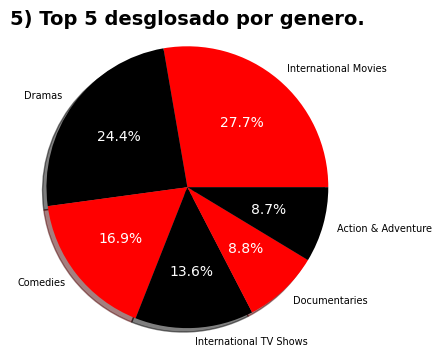

In [62]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
colors = ['red', 'black']
wedges, texts, autotexts = ax.pie(df_genero.Count,  labels=df_genero.Genero, autopct='%1.1f%%', shadow=True, startangle=0, colors=colors, textprops=dict(color="w"))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Ajustar las propiedades de los textos
for text in texts:
    text.set_fontsize(7)  # Reducing the font size for the labels
    text.set_color("black")  # Setting the text color to white
plt.title("5) Top 5 desglosado por genero.", fontdict={'fontsize': 14, 'fontweight': 'bold'})    
plt.show()

#### 6) Top rating de las 10 calificaciones con mayor incidencia

In [63]:
df_rating = data_netflix.groupby('rating').count()

df_rating = df_rating.sort_values(by='show_id', ascending=False).head(10).reset_index()

df_rating

,rating,show_id,type,title,director,country,date_added,release_year,duration,listed_in
0,TV-MA,3205,3205,3205,3205,3205,3205,3205,3205,3205
1,TV-14,2157,2157,2157,2157,2157,2157,2157,2157,2157
2,TV-PG,861,861,861,861,861,861,861,861,861
3,R,799,799,799,799,799,799,799,799,799
4,PG-13,490,490,490,490,490,490,490,490,490
5,TV-Y7,333,333,333,333,333,333,333,333,333
6,TV-Y,306,306,306,306,306,306,306,306,306
7,PG,287,287,287,287,287,287,287,287,287
8,TV-G,220,220,220,220,220,220,220,220,220
9,NR,79,79,79,79,79,79,79,79,79


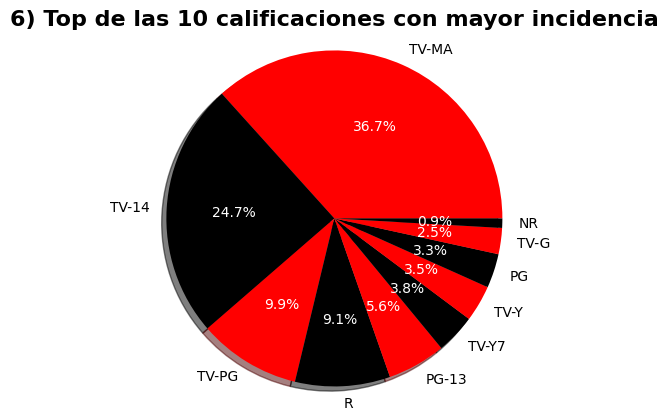

In [65]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
colors = ['red', 'black']
wedges, texts, autotexts = ax.pie(df_rating.show_id,  labels=df_rating.rating, autopct='%1.1f%%', shadow=True, startangle=0, colors=colors, textprops=dict(color="w"))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Ajustar las propiedades de los textos
for text in texts:
    text.set_fontsize(10)  # Reducing the font size for the labels
    text.set_color("black")  # Setting the text color to white
plt.title("6) Top de las 10 calificaciones con mayor incidencia", fontdict={'fontsize': 16, 'fontweight': 'bold'}) 
plt.show()

#### 7) Los 10 contenidos más antiguos

In [66]:
# Contar la cantidad de 'Movies' y 'TV Shows' por país
year_type_counts = data_netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Agregar una columna con el total de títulos por país
year_type_counts['Total'] = year_type_counts.sum(axis=1)

# Ordenar los países por el total de títulos de forma descendente y seleccionar los primeros 10
top_year = year_type_counts.sort_values(by='release_year', ascending=True).head(10)

print(top_year)

type          Movie  TV Show  Total
release_year                       
1925              0        1      1
1942              2        0      2
1943              3        0      3
1944              3        0      3
1945              3        1      4
1946              1        1      2
1947              1        0      1
1954              2        0      2
1955              3        0      3
1956              2        0      2


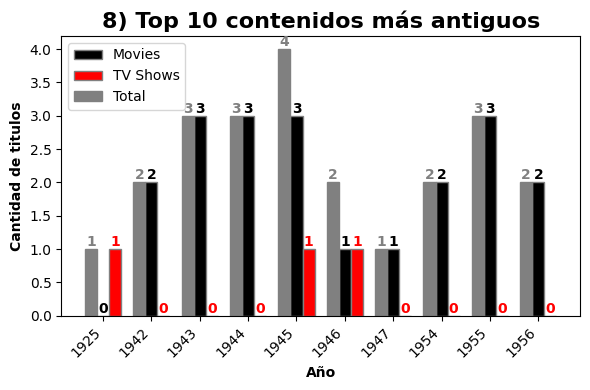

In [70]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(6, 4))

# Definir el ancho de las barras
bar_width = 0.25

# Definir la posición de las barras en el eje x
r1 = range(len(top_year))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
bars1 = ax.bar(r2, top_year['Movie'], color='black', width=bar_width, edgecolor='grey', label='Movies')
bars2 = ax.bar(r3, top_year['TV Show'], color='red', width=bar_width, edgecolor='grey', label='TV Shows')
bars3 = ax.bar(r1, top_year['Total'], color='grey', width=bar_width, edgecolor='grey', label='Total')

# Añadir etiquetas de país en el eje x
ax.set_xlabel('Año', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(top_year))])
ax.set_xticklabels(top_year.index, rotation=45, ha='right')

# Añadir etiquetas y título
ax.set_ylabel('Cantidad de titulos', fontweight='bold')
ax.set_title('8) Top 10 contenidos más antiguos', fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Añadir las etiquetas de valor encima de cada barra
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontweight='bold')
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='red', fontweight='bold')
for bar in bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='grey', fontweight='bold')


# Añadir leyenda
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


#### 8) Típos de contenido por año a partir del 2008

In [50]:
# Contar la cantidad de 'Movies' y 'TV Shows' por país
year_type_counts = data_netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Agregar una columna con el total de títulos por país
year_type_counts['Total'] = year_type_counts.sum(axis=1)

# Ordenar los países por el total de títulos de forma descendente y seleccionar los primeros 10
top_year = year_type_counts.sort_values(by='release_year', ascending=True)
top_year = top_year[top_year.index >= 2008]

print(top_year)

type          Movie  TV Show  Total
release_year                       
2008            113       22    135
2009            118       34    152
2010            153       39    192
2011            145       40    185
2012            173       63    236
2013            225       61    286
2014            264       88    352
2015            396      159    555
2016            658      243    901
2017            765      265   1030
2018            767      379   1146
2019            633      397   1030
2020            517      436    953
2021            277      315    592


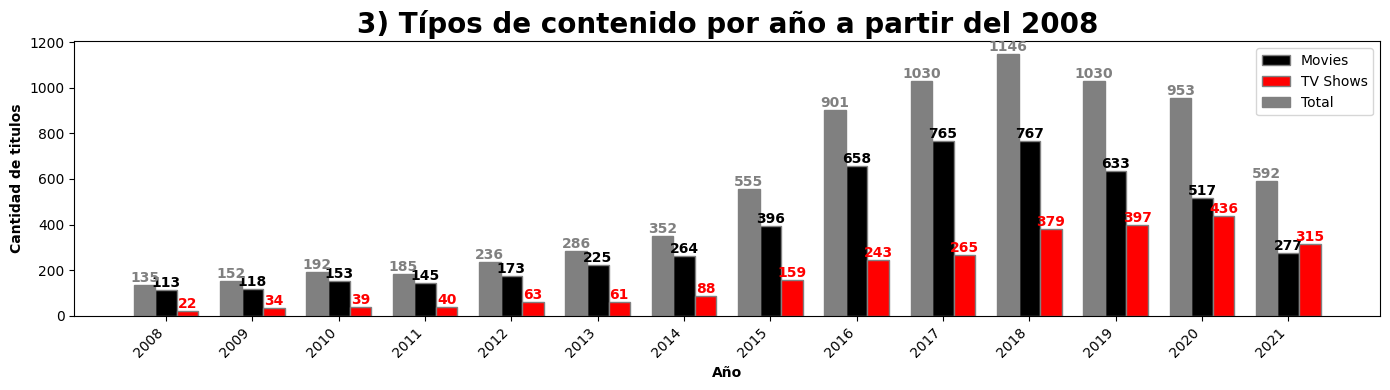

In [52]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(14, 4))

# Definir el ancho de las barras
bar_width = 0.25

# Definir la posición de las barras en el eje x
r1 = range(len(top_year))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
bars1 = ax.bar(r2, top_year['Movie'], color='black', width=bar_width, edgecolor='grey', label='Movies')
bars2 = ax.bar(r3, top_year['TV Show'], color='red', width=bar_width, edgecolor='grey', label='TV Shows')
bars3 = ax.bar(r1, top_year['Total'], color='grey', width=bar_width, edgecolor='grey', label='Total')

# Añadir etiquetas de país en el eje x
ax.set_xlabel('Año', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(top_year))])
ax.set_xticklabels(top_year.index, rotation=45, ha='right')

# Añadir etiquetas y título
ax.set_ylabel('Cantidad de titulos', fontweight='bold')
ax.set_title('3) Típos de contenido por año a partir del 2008', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Añadir las etiquetas de valor encima de cada barra
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontweight='bold')
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='red', fontweight='bold')
for bar in bars3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='grey', fontweight='bold')


# Añadir leyenda
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [349]:
top_year = top_year.reset_index()
top_year

type,release_year,Movie,TV Show,Total
0,2008,113,22,135
1,2009,118,34,152
2,2010,153,39,192
3,2011,145,40,185
4,2012,173,63,236
5,2013,225,61,286
6,2014,264,88,352
7,2015,396,159,555
8,2016,658,243,901
9,2017,765,265,1030


In [350]:
df = pd.DataFrame(top_year)

# Estilo de la tabla
def color_rows(row):
    # Obtener el índice de la fila
    idx = row.name
    if df.index.get_loc(idx) % 2 == 0:
        return ['background-color: black; color: white'] * len(row)
    else:
        return ['background-color: graydark; color: white'] * len(row)

styled_df = df.style.apply(color_rows, axis=1)
styled_df = styled_df.set_table_styles(
    [{'selector': 'thead th',
      'props': [('background-color', 'red'),
                ('color', 'white')]}])

# Mostrar la tabla estilizada
styled_df

type,release_year,Movie,TV Show,Total
0,2008,113,22,135
1,2009,118,34,152
2,2010,153,39,192
3,2011,145,40,185
4,2012,173,63,236
5,2013,225,61,286
6,2014,264,88,352
7,2015,396,159,555
8,2016,658,243,901
9,2017,765,265,1030


#### 9) Los 10 años con mayor cantidad de títulos

In [364]:
# Contar la cantidad de 'Movies' y 'TV Shows' por país
year_type_counts = data_netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Agregar una columna con el total de títulos por país
year_type_counts['Total'] = year_type_counts.sum(axis=1)

# Ordenar los países por el total de títulos de forma descendente y seleccionar los primeros 10
top_year = year_type_counts.sort_values(by='Total', ascending=False).head(10)


top_year

type,Movie,TV Show,Total
release_year,,,
2018,767,379,1146
2019,633,397,1030
2017,765,265,1030
2020,517,436,953
2016,658,243,901
2021,277,315,592
2015,396,159,555
2014,264,88,352
2013,225,61,286


In [368]:
top_year = top_year.reset_index()

top_year

type,release_year,Movie,TV Show,Total
0,2018,767,379,1146
1,2019,633,397,1030
2,2017,765,265,1030
3,2020,517,436,953
4,2016,658,243,901
5,2021,277,315,592
6,2015,396,159,555
7,2014,264,88,352
8,2013,225,61,286
9,2012,173,63,236


In [369]:
df = pd.DataFrame(top_year)

# Estilo de la tabla
def color_rows(row):
    # Obtener el índice de la fila
    idx = row.name
    if df.index.get_loc(idx) % 2 == 0:
        return ['background-color: black; color: white'] * len(row)
    else:
        return ['background-color: graydark; color: white'] * len(row)

styled_df = df.style.apply(color_rows, axis=1)
styled_df = styled_df.set_table_styles(
    [{'selector': 'thead th',
      'props': [('background-color', 'red'),
                ('color', 'white')]}])

# Mostrar la tabla estilizada
styled_df

type,release_year,Movie,TV Show,Total
0,2018,767,379,1146
1,2019,633,397,1030
2,2017,765,265,1030
3,2020,517,436,953
4,2016,658,243,901
5,2021,277,315,592
6,2015,396,159,555
7,2014,264,88,352
8,2013,225,61,286
9,2012,173,63,236


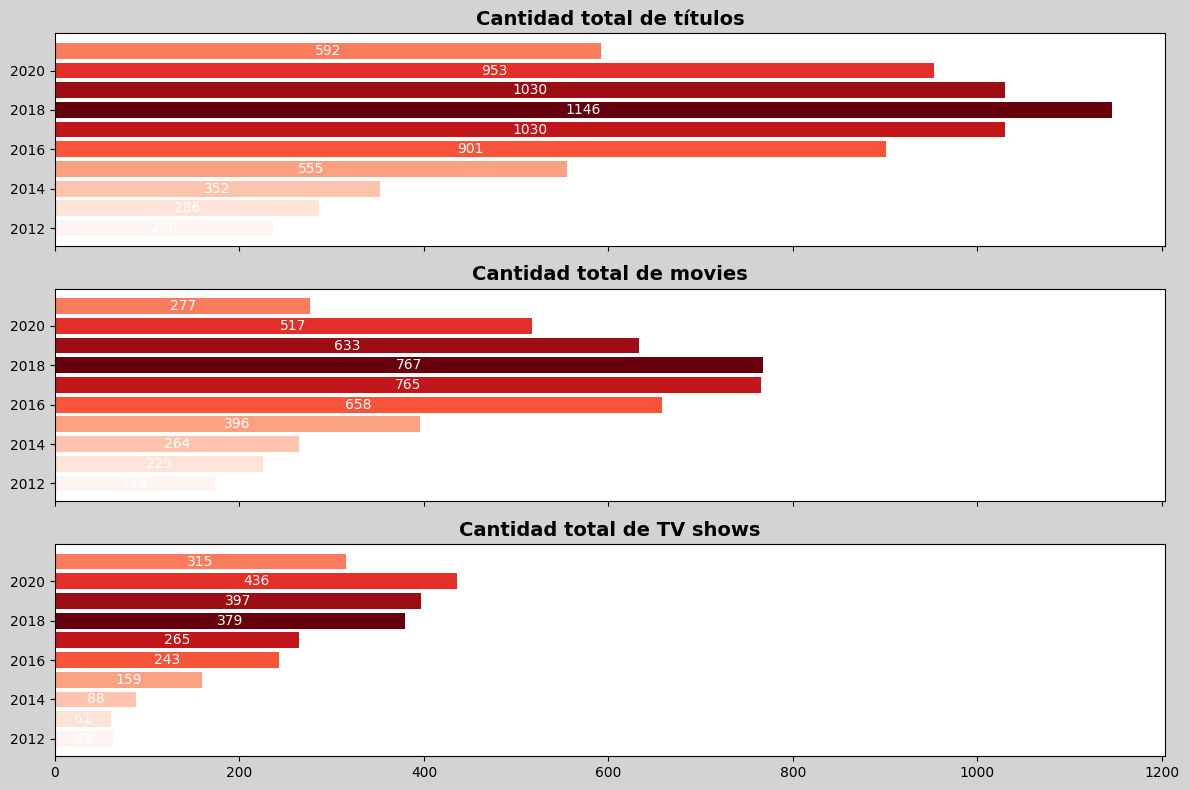

In [374]:
df = pd.DataFrame(top_year)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
fig.patch.set_facecolor('lightgrey')  # Color de fondo del gráfico

# Colores para las barras
colors = plt.cm.Reds_r(np.linspace(0, 1, len(df)))

# Gráfico de cantidad total de títulos
axs[0].barh(df['release_year'], df['Total'], color=colors)
axs[0].set_title('Cantidad total de títulos', fontsize=14, fontweight='bold')

# Gráfico de cantidad total de películas
axs[1].barh(df['release_year'], df['Movie'], color=colors)
axs[1].set_title('Cantidad total de movies', fontsize=14, fontweight='bold')

# Gráfico de cantidad total de programas de TV
axs[2].barh(df['release_year'], df['TV Show'], color=colors)
axs[2].set_title('Cantidad total de TV shows', fontsize=14, fontweight='bold')

# Añadir etiquetas de texto a cada barra
for ax in axs:
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', label_type='center', color='white')

plt.tight_layout()
plt.show()


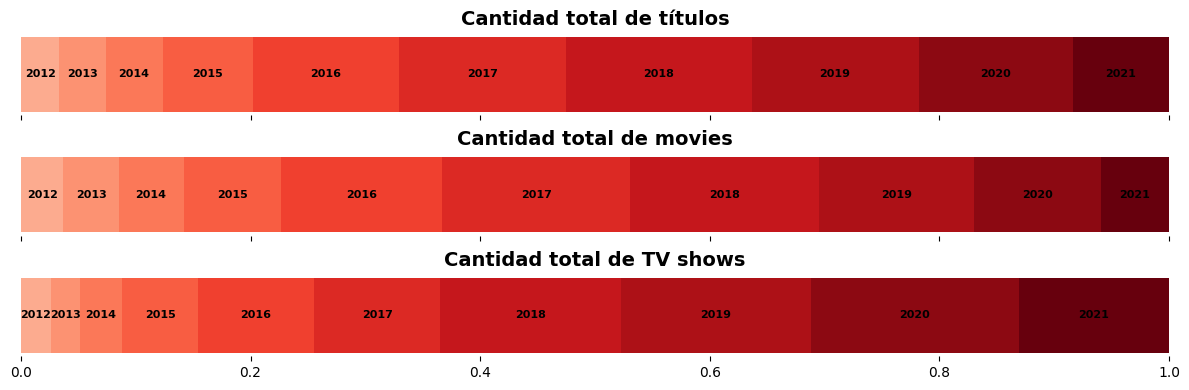

In [404]:
import pandas as pd
import matplotlib.pyplot as plt

df = top_year
# Definir el tamaño del gráfico
fig, axes = plt.subplots(3, 1, figsize=(12, 4), sharex=True)
#fig.patch.set_facecolor('lightgrey')  # Color de fondo del gráfico

# Ordenar los datos por 'release_year' ascendente para asegurar el orden cronológico
df = df.sort_values(by='release_year', ascending=True)

# Función para crear una cinta horizontal
def plot_ribbon(ax, values, labels, title, colors):
    start = 0
    total_sum = sum(values)
    for i, (val, label) in enumerate(zip(values, labels)):
        relative_val = val / total_sum  # Valor relativo al total
        ax.barh(0, relative_val, left=start, color=colors[i])
        ax.text(start + relative_val / 2, 0, f'{label}', ha='center', va='center', color='black', fontweight='bold', fontsize=8)
        start += relative_val
    ax.set_yticks([])
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlim(0, 1)  # Escala de 0 a 1 para representar el 100%
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Colores para las barras
colors = plt.cm.Reds(np.linspace(0.3, 1, len(df)))

# Dibujar las cintas horizontales
plot_ribbon(axes[0], df['Total'], df['release_year'], 'Cantidad total de títulos', colors)
plot_ribbon(axes[1], df['Movie'], df['release_year'], 'Cantidad total de movies', colors)
plot_ribbon(axes[2], df['TV Show'], df['release_year'], 'Cantidad total de TV shows', colors)

# Ajustar las etiquetas de los ejes y los títulos
#for ax in axes:
#    ax.set_xlabel('Proporción del total')

plt.tight_layout()
plt.show()
